# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [35]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [36]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [37]:
fraud['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Our target variable is distributed in 1 for frauds and 0 for no frauds, it is imbalanced because the difference between both distributions is very big. 

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

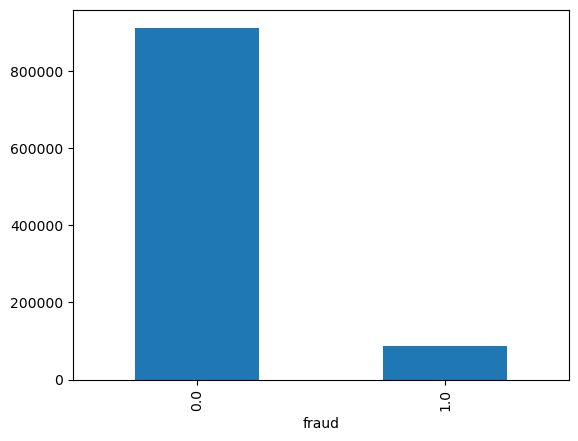

In [39]:
frauds = fraud["fraud"].value_counts()
frauds.plot(kind="bar")
plt.show()

In [40]:
X = fraud.drop(columns = ["fraud"])
y = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
log_reg = LogisticRegression()

In [43]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [44]:
log_reg.score(X_test_scaled, y_test)

0.958404

In [45]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228062
         1.0       0.89      0.60      0.72     21938

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



# OVERSAMPLE

train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [46]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [47]:
train["fraud"] = y_train.values

In [48]:
fraud_yes = train[train["fraud"] == 1]
fraud_no = train[train["fraud"] == 0]

In [49]:
yes_fraud_oversampled = resample(fraud_yes, 
                                    replace=True, 
                                    n_samples = len(fraud_no),
                                    random_state=0)

In [50]:
train_over = pd.concat([yes_fraud_oversampled, fraud_no])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31278,-0.217904,-0.047650,1.031872,0.367010,-0.733806,-0.334313,0.733453,1.0
496924,-0.395947,1.828716,0.276486,-2.724725,1.362758,-0.334313,0.733453,1.0
485943,-0.300969,-0.183296,4.582276,0.367010,-0.733806,-0.334313,0.733453,1.0
599013,-0.251994,-0.151973,3.654945,0.367010,1.362758,-0.334313,0.733453,1.0
524429,3.108150,-0.055723,-0.241666,0.367010,-0.733806,-0.334313,0.733453,1.0
...,...,...,...,...,...,...,...,...
749995,0.759916,-0.149661,0.619912,0.367010,-0.733806,-0.334313,0.733453,0.0
749996,2.775329,-0.179718,-0.240972,0.367010,-0.733806,-0.334313,-1.363413,0.0
749997,-0.393294,-0.120654,-0.548478,-2.724725,-0.733806,-0.334313,0.733453,0.0
749998,-0.336907,-0.185403,-0.468729,0.367010,1.362758,-0.334313,0.733453,0.0


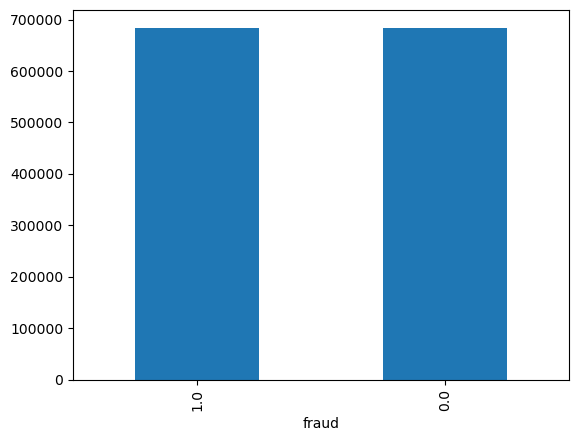

In [51]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [52]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [53]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [54]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228062
         1.0       0.57      0.95      0.72     21938

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



# UNDERSAMPLE

In [55]:
no_diabetes_undersampled = resample(fraud_no, 
                                    replace=False, 
                                    n_samples = len(fraud_yes),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
108077,-0.357220,-0.165316,-0.039315,0.367010,1.362758,-0.334313,-1.363413,0.0
702360,1.105545,-0.185836,-0.406726,0.367010,-0.733806,-0.334313,0.733453,0.0
33230,-0.373990,-0.130123,0.755095,-2.724725,-0.733806,-0.334313,0.733453,0.0
74032,-0.358173,11.184310,-0.378145,0.367010,-0.733806,-0.334313,-1.363413,0.0
297428,1.504429,-0.183674,-0.465140,0.367010,1.362758,-0.334313,0.733453,0.0
...,...,...,...,...,...,...,...,...
134094,-0.242067,-0.179584,-0.081588,0.367010,1.362758,-0.334313,0.733453,0.0
358815,-0.312692,-0.175437,-0.632158,0.367010,-0.733806,-0.334313,0.733453,0.0
59779,-0.302454,-0.170665,-0.368046,0.367010,1.362758,2.991211,-1.363413,0.0
666148,0.051142,-0.173638,-0.314332,0.367010,-0.733806,-0.334313,0.733453,0.0


In [56]:
train_under = pd.concat([no_diabetes_undersampled, fraud_yes])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
108077,-0.357220,-0.165316,-0.039315,0.367010,1.362758,-0.334313,-1.363413,0.0
702360,1.105545,-0.185836,-0.406726,0.367010,-0.733806,-0.334313,0.733453,0.0
33230,-0.373990,-0.130123,0.755095,-2.724725,-0.733806,-0.334313,0.733453,0.0
74032,-0.358173,11.184310,-0.378145,0.367010,-0.733806,-0.334313,-1.363413,0.0
297428,1.504429,-0.183674,-0.465140,0.367010,1.362758,-0.334313,0.733453,0.0
...,...,...,...,...,...,...,...,...
749914,0.245008,-0.181419,0.796946,0.367010,-0.733806,-0.334313,0.733453,1.0
749923,0.488454,0.135539,0.899456,0.367010,-0.733806,-0.334313,0.733453,1.0
749949,1.091047,-0.094691,3.269302,0.367010,-0.733806,-0.334313,0.733453,1.0
749964,0.142628,-0.105702,1.173019,0.367010,-0.733806,-0.334313,0.733453,1.0


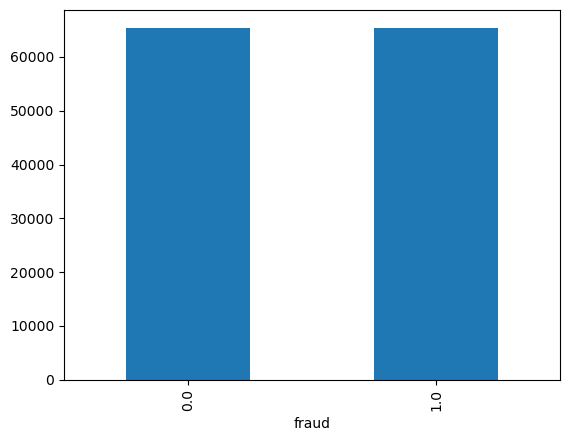

In [57]:
fraud_y_plt = train_under["fraud"].value_counts()
fraud_y_plt.plot(kind="bar")
plt.show()

In [58]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [60]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228062
         1.0       0.57      0.95      0.72     21938

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [63]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [64]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [65]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228062
         1.0       0.57      0.95      0.71     21938

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

